# National UFO Reporting Center Data Analysis

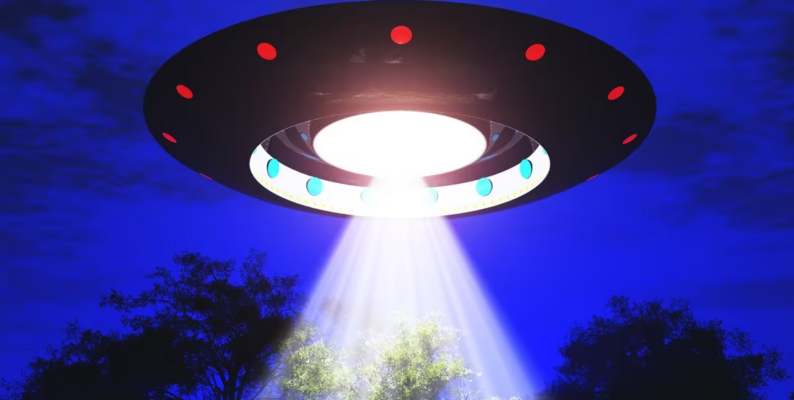


## Overview

This project analyzes UFO sighting data collected by the National UFO Reporting Center (NUFORC), which has recorded over 80,000 reports from 1949 to 2013. By conducting a descriptive analysis of sighting locations, timings, and characteristics, we aim to uncover patterns and trends in UFO sightings. Our analysis explores key questions such as the most commonly reported UFO shapes, the times and places where sightings are most frequent, and whether any correlations exist between the time of sighting and the likelihood of a UFO encounter.

## Business Problem


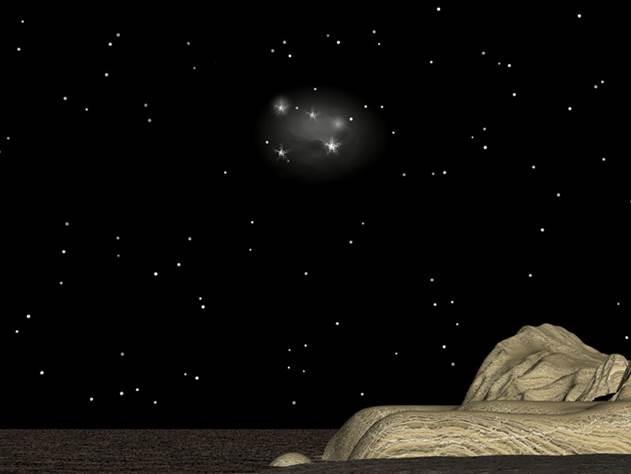
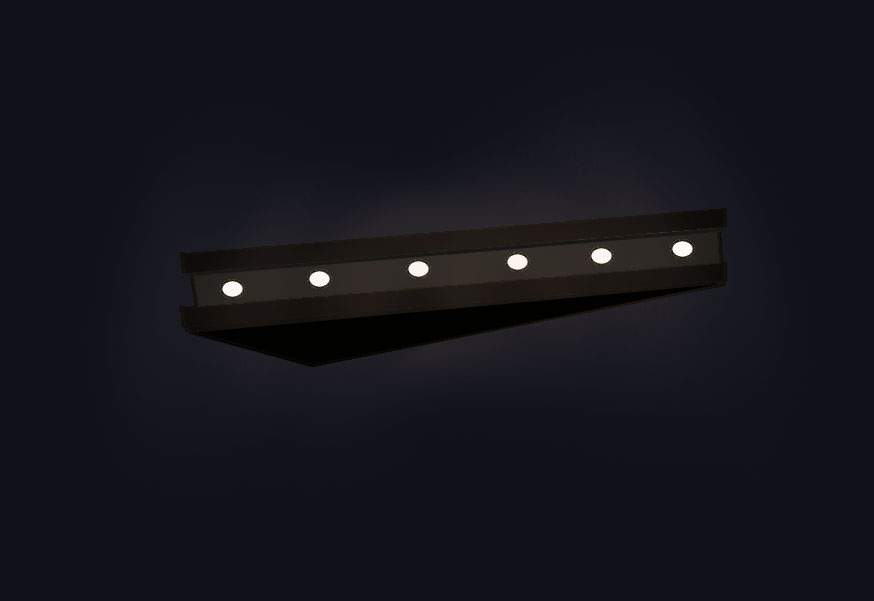



By identifying patterns in UFO sightings, the National UFO Reporting Center can enhance its ability to communicate findings to researchers, enthusiasts, and governmental entities. Providing clear, data-driven visualizations of UFO sighting frequencies, shapes, and encounter characteristics will improve the understanding of these phenomena for tourist, government, or aerospace agencies. This, in turn, will support strategic decisions related to future research, public education, and potential resource allocation for investigating UFO encounters.

## Data Understanding

The dataset contains detailed information on UFO sightings reported globally. It includes key features like the date and time of the sighting, geographic information (country, region, and locale), descriptions of the UFO (shape and encounter duration), and other attributes that can be used for exploratory data analysis and predictive modeling.
Given the diverse nature of this dataset, we will focus on cleaning and processing the data to answer three key business questions:

1. What regions and times have the highest frequency of UFO sightings?
     - We will use the Country, Region, Locale, Year, Month, Hour, and Season columns to find the hotspots for UFO activity.
2. Are there notable patterns in UFO shapes, descriptions, or lengths of encounters?
     - The columns UFO_shape, length_of_encounter_seconds, and Description will be analyzed to explore common shapes, durations, and narratives in the reported encounters.
3. Can any correlations be drawn between the timing (season, time of day) and the likelihood of a sighting? (Is there a potential for identifying anomalies or "false positives" in the sighting reports?)
     - We will explore correlations between the Season, Month, Hour, and length_of_encounter_seconds to see if UFO sightings show patterns based on the time of day or season of the year.

In [26]:
#Import and load the data with pandas 

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

%matplotlib inline

import os
os.chdir("/Users/saniaspry/Documents/Flatiron/Assignments/Phase1/Phase-1 Project/Phase-1-Project/")

In [28]:
ufo_df = pd.read_csv("data/ufo_data/ufo-sightings-transformed.csv", index_col=0)

In [29]:
ufo_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80328 entries, 0 to 80327
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date_time                    80328 non-null  object 
 1   date_documented              80328 non-null  object 
 2   Year                         80328 non-null  int64  
 3   Month                        80328 non-null  int64  
 4   Hour                         80328 non-null  int64  
 5   Season                       80328 non-null  object 
 6   Country_Code                 80069 non-null  object 
 7   Country                      80069 non-null  object 
 8   Region                       79762 non-null  object 
 9   Locale                       79871 non-null  object 
 10  latitude                     80328 non-null  float64
 11  longitude                    80328 non-null  float64
 12  UFO_shape                    78398 non-null  object 
 13  length_of_encounter_s

### UFO Data

The UFO sighting datset includes over 80,000 records of UFO sightings from October 1949 to September 2013, and captures a wide variety of sighting locations, times, and characteristics, such as UFO shapes and encounter durations.

In [30]:
ufo_df.head()

,Date_time,date_documented,Year,Month,Hour,Season,Country_Code,Country,Region,Locale,latitude,longitude,UFO_shape,length_of_encounter_seconds,Encounter_Duration,Description
0,1949-10-10 20:30:00,4/27/2004,1949,10,20,Autumn,USA,United States,Texas,San Marcos,29.883056,-97.941111,Cylinder,2700.0,45 minutes,This event took place in early fall around 194...
1,1949-10-10 21:00:00,12/16/2005,1949,10,21,Autumn,USA,United States,Texas,Bexar County,29.384210,-98.581082,Light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...
2,1955-10-10 17:00:00,1/21/2008,1955,10,17,Autumn,GBR,United Kingdom,England,Chester,53.200000,-2.916667,Circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...
3,1956-10-10 21:00:00,1/17/2004,1956,10,21,Autumn,USA,United States,Texas,Edna,28.978333,-96.645833,Circle,20.0,1/2 hour,My older brother and twin sister were leaving ...
4,1960-10-10 20:00:00,1/22/2004,1960,10,20,Autumn,USA,United States,Hawaii,Kaneohe,21.418056,-157.803611,Light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...


In [ ]:
ufo_df[]

In [9]:
ufo_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80328 entries, 0 to 80327
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date_time                    80328 non-null  object 
 1   date_documented              80328 non-null  object 
 2   Year                         80328 non-null  int64  
 3   Month                        80328 non-null  int64  
 4   Hour                         80328 non-null  int64  
 5   Season                       80328 non-null  object 
 6   Country_Code                 80069 non-null  object 
 7   Country                      80069 non-null  object 
 8   Region                       79762 non-null  object 
 9   Locale                       79871 non-null  object 
 10  latitude                     80328 non-null  float64
 11  longitude                    80328 non-null  float64
 12  UFO_shape                    78398 non-null  object 
 13  length_of_encounter_s

In [10]:
df.isnull().sum()

Date_time                         0
date_documented                   0
Year                              0
Month                             0
Hour                              0
Season                            0
Country_Code                    259
Country                         259
Region                          566
Locale                          457
latitude                          0
longitude                         0
UFO_shape                      1930
length_of_encounter_seconds       0
Encounter_Duration                0
Description                      15
dtype: int64

# Data Cleaning

**Time Standardization**

In [11]:
#Standardize Dates and Times
#Convert Date_time to datetime format
df['Date_time'] = pd.to_datetime(df['Date_time'], errors='coerce')
df.head()

,Date_time,date_documented,Year,Month,Hour,Season,Country_Code,Country,Region,Locale,latitude,longitude,UFO_shape,length_of_encounter_seconds,Encounter_Duration,Description
0,1949-10-10 20:30:00,4/27/2004,1949,10,20,Autumn,USA,United States,Texas,San Marcos,29.883056,-97.941111,Cylinder,2700.0,45 minutes,This event took place in early fall around 194...
1,1949-10-10 21:00:00,12/16/2005,1949,10,21,Autumn,USA,United States,Texas,Bexar County,29.384210,-98.581082,Light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...
2,1955-10-10 17:00:00,1/21/2008,1955,10,17,Autumn,GBR,United Kingdom,England,Chester,53.200000,-2.916667,Circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...
3,1956-10-10 21:00:00,1/17/2004,1956,10,21,Autumn,USA,United States,Texas,Edna,28.978333,-96.645833,Circle,20.0,1/2 hour,My older brother and twin sister were leaving ...
4,1960-10-10 20:00:00,1/22/2004,1960,10,20,Autumn,USA,United States,Hawaii,Kaneohe,21.418056,-157.803611,Light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...


In [12]:
#Standardize the date_documented column
df['date_documented'] = pd.to_datetime(df['date_documented'], errors='coerce')
df.head()

,Date_time,date_documented,Year,Month,Hour,Season,Country_Code,Country,Region,Locale,latitude,longitude,UFO_shape,length_of_encounter_seconds,Encounter_Duration,Description
0,1949-10-10 20:30:00,2004-04-27,1949,10,20,Autumn,USA,United States,Texas,San Marcos,29.883056,-97.941111,Cylinder,2700.0,45 minutes,This event took place in early fall around 194...
1,1949-10-10 21:00:00,2005-12-16,1949,10,21,Autumn,USA,United States,Texas,Bexar County,29.384210,-98.581082,Light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...
2,1955-10-10 17:00:00,2008-01-21,1955,10,17,Autumn,GBR,United Kingdom,England,Chester,53.200000,-2.916667,Circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...
3,1956-10-10 21:00:00,2004-01-17,1956,10,21,Autumn,USA,United States,Texas,Edna,28.978333,-96.645833,Circle,20.0,1/2 hour,My older brother and twin sister were leaving ...
4,1960-10-10 20:00:00,2004-01-22,1960,10,20,Autumn,USA,United States,Hawaii,Kaneohe,21.418056,-157.803611,Light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...


In [13]:
#Standardize Year, Month, Hour and Season Column 
#Year, Month, and Hour : are they derived accurately from Date_time?
#Season: grouping months into seasons
df['Year'] = df['Date_time'].dt.year
df['Month'] = df['Date_time'].dt.month
df['Hour'] = df['Date_time'].dt.hour

#Seasons
df['Season'] = df['Month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else 'Spring' if x in [3, 4, 5] else 'Summer' if x in [6, 7, 8] else 'Autumn')

df.head()

,Date_time,date_documented,Year,Month,Hour,Season,Country_Code,Country,Region,Locale,latitude,longitude,UFO_shape,length_of_encounter_seconds,Encounter_Duration,Description
0,1949-10-10 20:30:00,2004-04-27,1949,10,20,Autumn,USA,United States,Texas,San Marcos,29.883056,-97.941111,Cylinder,2700.0,45 minutes,This event took place in early fall around 194...
1,1949-10-10 21:00:00,2005-12-16,1949,10,21,Autumn,USA,United States,Texas,Bexar County,29.384210,-98.581082,Light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...
2,1955-10-10 17:00:00,2008-01-21,1955,10,17,Autumn,GBR,United Kingdom,England,Chester,53.200000,-2.916667,Circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...
3,1956-10-10 21:00:00,2004-01-17,1956,10,21,Autumn,USA,United States,Texas,Edna,28.978333,-96.645833,Circle,20.0,1/2 hour,My older brother and twin sister were leaving ...
4,1960-10-10 20:00:00,2004-01-22,1960,10,20,Autumn,USA,United States,Hawaii,Kaneohe,21.418056,-157.803611,Light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...


In [14]:
#Standardize the length of encounter seconds column
# Convert 'length_of_encounter_seconds' to numeric, forcing errors to NaN
df['length_of_encounter_seconds'] = pd.to_numeric(df['length_of_encounter_seconds'], errors='coerce')

# Remove outliers (e.g., encounters longer than a day)
df = df[df['length_of_encounter_seconds'] <= 86400]  # 86400 seconds = 24 hours

# Verify changes
df['length_of_encounter_seconds'].describe()

count    80149.000000
mean       927.394452
std       3428.872201
min          0.001000
25%         30.000000
50%        180.000000
75%        600.000000
max      86400.000000
Name: length_of_encounter_seconds, dtype: float64

In [15]:
# Display unique values to understand various formats in 'Encounter_Duration'
df['Encounter_Duration'].unique()[:20]  # Display first 20 unique values to analyze different formats

array(['45 minutes', '1-2 hrs', '20 seconds', '1/2 hour', '15 minutes',
       '5 minutes', 'about 3 mins', '20 minutes', '3  minutes',
       'several minutes', '5 min.', '3 minutes', '30 min.', '30 seconds',
       '20minutes', '2 minutes', '20-30 min', '20 sec.', 'one hour?',
       '5-6 minutes'], dtype=object)

In [16]:
#Unify the units into seconds and convert to numeric in Encounter_Duration column

**Handling Geographical Data**

In [17]:
#Standardize Country Codes and Names.
#Ensure that the country codes and Country values are consistent.
df['Country_Code']=df['Country_Code'].str.upper().str.strip()
df['Country'] = df['Country'].str.title().str.strip()

df['Country_Code'].unique()

array(['USA', 'GBR', 'BMU', 'CAN', 'NZL', 'RUS', 'AUS', 'LTU', 'NOR',
       'ISL', 'MEX', 'AUT', 'JPN', 'VNM', nan, 'TUR', 'BEL', 'CHN', 'GRC',
       'IRQ', 'MYS', 'ARM', 'FRA', 'CHL', 'IDN', 'IND', 'THA', 'HUN',
       'DEU', 'ESP', 'PHL', 'VEN', 'PAK', 'IRN', 'AFG', 'MAR', 'TWN',
       'SAU', 'ZAF', 'HRV', 'COL', 'ISR', 'EGY', 'PRI', 'POL', 'SRB',
       'IRL', 'PAN', 'CRI', 'KOR', 'HND', 'SWE', 'ITA', 'NLD', 'DOM',
       'MKD', 'ARG', 'CYP', 'NAM', 'BGD', 'JAM', 'SYR', 'ARE', 'GRL',
       'KWT', 'ROU', 'UKR', 'BGR', 'SVK', 'TUN', 'DZA', 'TTO', 'FIN',
       'CS-KM', 'LBN', 'LBY', 'MDG', 'LKA', 'BIH', 'LVA', 'SUR', 'GTM',
       'UZB', 'GHA', 'BRA', 'NPL', 'BOL', 'PRT', 'QAT', 'JOR', 'MMR',
       'SVN', 'DNK', 'LUX', 'BRN', 'MLT', 'CUB', 'ZWE', 'AZE', 'FJI',
       'SLB', 'PRY', 'EST', 'OMN', 'LSO', 'NGA', 'CHE', 'KEN', 'HTI',
       'GUY', 'PER', 'BLR', 'CZE', 'BLZ', 'ECU', 'SLV', 'TZA', 'ZMB',
       'KHM', 'AGO', 'ETH', 'CMR', 'TLS', 'ALB', 'SEN', 'BHS', 'BWA',
       'URY',

In [18]:
# Ensure latitude and longitude are within valid ranges
df = df[(df['latitude'] >= -90) & (df['latitude'] <= 90)]
df = df[(df['longitude'] >= -180) & (df['longitude'] <= 180)]

# Verify the changes
df[['latitude', 'longitude']].describe()

,latitude,longitude
count,80149.000000,80149.000000
mean,38.127226,-86.782611
std,10.465888,39.666774
min,-82.862752,-176.658056
25%,34.136111,-112.073333
50%,39.414167,-87.903333
75%,42.788333,-78.756944
max,72.700000,178.441900


In [19]:
#Replace country values with longitudes and latitudes using geopanda or geopy

In [20]:
#pip install geopy

In [21]:
#Decide to just drop the rows with missing values in the Country column
# Drop rows with missing values in 'Country_Code', 'Country', 'Region', 'Locale', and 'UFO_shape'
df.dropna(subset=['Country_Code', 'Country', 'Region', 'Locale'], inplace=True)
print(df)

                Date_time date_documented  Year  Month  Hour  Season  \
0     1949-10-10 20:30:00      2004-04-27  1949     10    20  Autumn   
1     1949-10-10 21:00:00      2005-12-16  1949     10    21  Autumn   
2     1955-10-10 17:00:00      2008-01-21  1955     10    17  Autumn   
3     1956-10-10 21:00:00      2004-01-17  1956     10    21  Autumn   
4     1960-10-10 20:00:00      2004-01-22  1960     10    20  Autumn   
...                   ...             ...   ...    ...   ...     ...   
80323 2013-09-09 21:15:00      2013-09-30  2013      9    21  Autumn   
80324 2013-09-09 22:00:00      2013-09-30  2013      9    22  Autumn   
80325 2013-09-09 22:00:00      2013-09-30  2013      9    22  Autumn   
80326 2013-09-09 22:20:00      2013-09-30  2013      9    22  Autumn   
80327 2013-09-09 23:00:00      2013-09-30  2013      9    23  Autumn   

      Country_Code         Country      Region        Locale   latitude  \
0              USA   United States       Texas    San Marcos

In [22]:
# Verify changes to ensure rows with missing values in the specified columns are dropped
print(df[['Country_Code', 'Country', 'Region', 'Locale', 'UFO_shape']].isnull().sum())

Country_Code       0
Country            0
Region             0
Locale             0
UFO_shape       1895
dtype: int64


In [23]:
df['UFO_shape'].fillna('Unknown', inplace=True)

/var/folders/p9/l56kxrqj1f50k63kvkm8k0nm0000gp/T/ipykernel_26340/2622854879.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['UFO_shape'].fillna('Unknown', inplace=True)


# Questions